<a href="https://colab.research.google.com/github/amalvarezme/AnaliticaDatos/blob/master/2_Regresion/1_Guia_LadoaLado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Construyendo un proyecto de aprendizaje de máquina**

## Aplicación en regresión

*Códigos referencia del libro Hands-On Machine Learning with Scikit-Learn and Tensor Flow 2017 (Cap 2) -- Aurélien Géron

In [ ]:
#cargar datos desde drive acceso libre
FILEID = "1vrk5heTgxMBZagbw62SSVSWvfrW--Jgz"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O codigos.zip && rm -rf /tmp/cookies.txt
!unzip codigos.zip
!dir

^C
Archive:  codigos.zip
replace datasets/housing/housing.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: codigos.zip  datasets  results	sample_data


# Etapas principales en un sistema de aprendizaje de máquina

1. Observar el problema (ayuda interdisciplinar)
2. Obtener los datos
3. *Análisis exploratorio incial (visualizar los datos y estadística descriptiva básica)*
4. *Preparar los datos para los algoritmos de aprendizaje de máquina (evaluación, preproceso, caracterización, aprendizaje)*
5. *Seleccionar un modelo y entrenar*
6. *Sintonizar el modelo escogido*
7. Presentar la solución
8. Lanzar la solución, monitorear y mantener el sistema de aprendizaje de máquina.

# Problema a resolver

**Objetivo**: predecir precios medios en distritos de [California Housing Prices](https://www.kaggle.com/camnugent/california-housing-prices).

**Insumos**: Características de los distritos.

# Inicio códigos

**Preparar modulos principales, funciones inline, paths para guardar archivos y figuras:**

In [ ]:
import numpy as np #importar librerias básicas
import os

# fijar semilla para fines pedagógicos
np.random.seed(42)

#render de figs sobre notebook
%matplotlib inline
# para graficar
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#crear carpeta con resultados
import os
try:
  os.mkdir('results')
except:
  print("Carpeta results ya existe")

import warnings #eliminar warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

Carpeta results ya existe


# Obtener los datos

In [ ]:
import pandas as pd #importar pandas
housing = pd.read_csv('datasets/housing/housing.csv')#leer archivo csv con pandas
housing.head() #encabezado principal

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Análisis exploratorio básico

In [ ]:
housing.info() #revisar cantidad de datos, tipos de datos, campos vacios

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing["ocean_proximity"].value_counts() #conteo de los valores en una característica

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
housing.describe() # estadística básica de las variables

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
x  = np.array([-500,-2,0,0.5,4,10,1000]) #diferencias entre media y mediana
print(np.median(x),x.mean())

0.5 73.21428571428571


**Nota**: los [cuartiles](https://en.wikipedia.org/wiki/Interquartile_range) permiten revisar la asimetría de los datos.

# Indexación básica de usando pandas - DataFrame

In [ ]:
housing.index[1] #el indice se refiere a las filas (muestras)

1

In [ ]:
housing.loc[[0,4,5],['longitude','latitude']] #para indexar filas y columnas se pueden utilizar listas con los nombres de indices y columnas

,longitude,latitude
0,-122.23,37.88
4,-122.25,37.85
5,-122.25,37.85


In [ ]:
housing.loc[housing.index[[0,2,3]]] #los indices están en la variable index y se utiliza el método loc

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY


In [ ]:
housing[housing.columns[0:5]]#las columnas (atributos estan en la variable columns) por defecto se refieren como los keys de un diccionario

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms
0,-122.23,37.88,41.0,880.0,129.0
1,-122.22,37.86,21.0,7099.0,1106.0
2,-122.24,37.85,52.0,1467.0,190.0
3,-122.25,37.85,52.0,1274.0,235.0
4,-122.25,37.85,52.0,1627.0,280.0
...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0
20636,-121.21,39.49,18.0,697.0,150.0
20637,-121.22,39.43,17.0,2254.0,485.0
20638,-121.32,39.43,18.0,1860.0,409.0


In [ ]:
housing.iloc[0:5,4:7] # con el método iloc se puede indexar igual que en la librería numpy

,total_bedrooms,population,households
0,129.0,322.0,126.0
1,1106.0,2401.0,1138.0
2,190.0,496.0,177.0
3,235.0,558.0,219.0
4,280.0,565.0,259.0


In [ ]:
housing.loc[0] #se indexa el primer elemento de la matriz

longitude              -122.23
latitude                 37.88
housing_median_age        41.0
total_rooms              880.0
total_bedrooms           129.0
population               322.0
households               126.0
median_income           8.3252
median_house_value    452600.0
ocean_proximity       NEAR BAY
Name: 0, dtype: object

In [ ]:
housing['latitude'] #se indexa la variable latitude

0        37.88
1        37.86
2        37.85
3        37.85
4        37.85
         ...  
20635    39.48
20636    39.49
20637    39.43
20638    39.43
20639    39.37
Name: latitude, Length: 20640, dtype: float64

In [ ]:
housing.to_numpy() #to_numpy() convierte el dataframe a numpy array

array([[-122.23, 37.88, 41.0, ..., 8.3252, 452600.0, 'NEAR BAY'],
       [-122.22, 37.86, 21.0, ..., 8.3014, 358500.0, 'NEAR BAY'],
       [-122.24, 37.85, 52.0, ..., 7.2574, 352100.0, 'NEAR BAY'],
       ...,
       [-121.22, 39.43, 17.0, ..., 1.7, 92300.0, 'INLAND'],
       [-121.32, 39.43, 18.0, ..., 1.8672, 84700.0, 'INLAND'],
       [-121.24, 39.37, 16.0, ..., 2.3886, 89400.0, 'INLAND']],
      dtype=object)

In [ ]:
housing["median_house_value"].describe() # estadística básica de las variable de interés

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [ ]:
housing['ocean_proximity'][housing['ocean_proximity']=='INLAND']

954      INLAND
957      INLAND
965      INLAND
967      INLAND
968      INLAND
          ...  
20635    INLAND
20636    INLAND
20637    INLAND
20638    INLAND
20639    INLAND
Name: ocean_proximity, Length: 6551, dtype: object

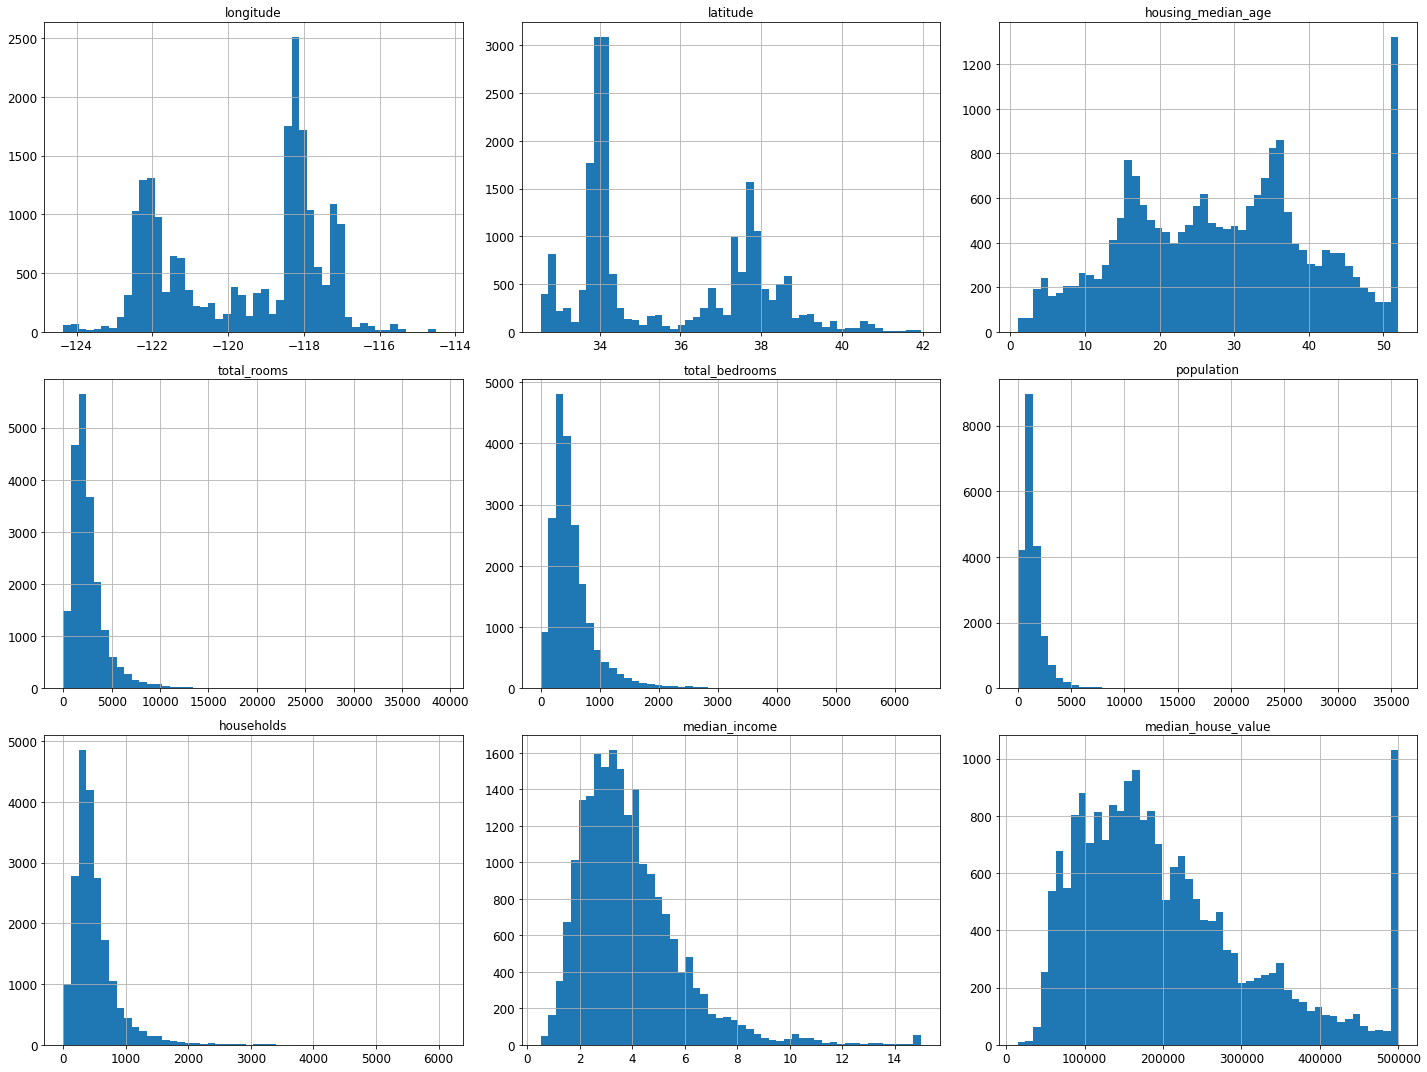

In [ ]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.savefig('results/attribute_histogram_plots.pdf', format='pdf', dpi=300)#para grabar resultados en pdf
plt.show()

# **Ejercicio 1**

- Discuta los histogramas visualizados.
- Respecto a la variable de interés a predecir, qué puede inferer del histograma?

# Preparar datos

- Incluye análisis exploratorio y preprocesamiento referente a campos vacios y datos tipo categóricos.

**Nota**:

Se recomienda realizar una partición training/testing para no sobreajustar los análisis a los datos de training

![CV](https://github.com/amalvarezme/AnaliticaDatos/blob/master/2_Regresion/crossvalidation.png?raw=1)




In [ ]:
from sklearn.model_selection import train_test_split #particionar

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)#20% para testing, dejando semilla fija

In [ ]:
print(train_set.shape,test_set.shape)#se revisa el tamaño de los sets

(16512, 10) (4128, 10)


In [ ]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


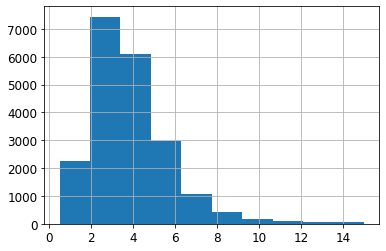

In [ ]:
housing["median_income"].hist()
plt.show()

**Preproceso variable median_income -> continua a categórica**

In [ ]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5]) # se umbraliza por rangos la variable median income

In [ ]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

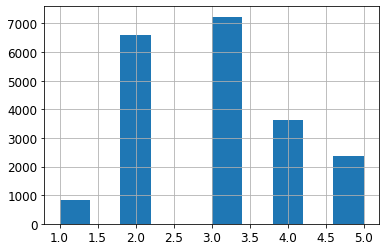

In [ ]:
housing["income_cat"].hist()
plt.show()

**Nota**: para evitar problemas a la hora de particionar los datos, se recomiendo utilizar muestreo estratificado cuando hay distribuciones asimétricas en las distribuciones de las variables (desbalance).

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit #método para participación estratificado

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"].values): #income_cat es la variable a utilizar para estratificar
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [ ]:
test_index #split define la fila a escoger durante la partición

array([ 5241, 17352,  3505, ..., 17223, 10786,  3965])

In [ ]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set)#conteo datos estratificados en train

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64

In [ ]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)#conteo datos estratificados en test

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [ ]:
housing["income_cat"].value_counts() / len(housing) #conteo datos originales

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

**Comparar errores en particiones con y sin estratificación**

In [ ]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({ #se crea diccionario para revisar porcentajes
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [ ]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [ ]:
for set_ in (strat_train_set, strat_test_set): #retirar filas y columnas
    set_.drop("income_cat", axis=1, inplace=True)
#strat_train_set.drop("income_cat", axis=1, inplace=True) #se puede realizar elemento a elemento
#strat_test_set.drop("income_cat", axis=1, inplace=True)

In [ ]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


# Análisis exploratorio y visualización sobre datos muestreados

In [ ]:
housing = strat_train_set.copy() #se copia los datos estratificados
housing.shape

(16512, 10)

In [ ]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN


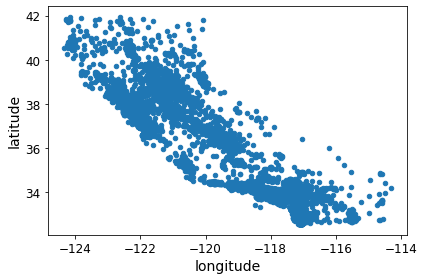

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude") #visualización georeferenciada
plt.tight_layout()
plt.savefig('results/bad_visualization_plot.pdf', format='pdf', dpi=300)
plt.show()

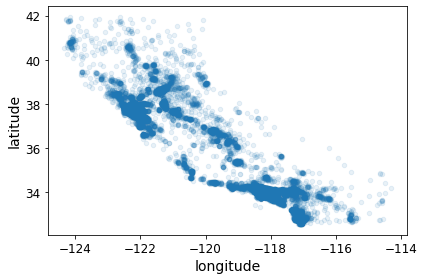

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1) #alpha controla la trasparencia
plt.tight_layout()
plt.savefig('results/bad_visualization_plot.pdf', format='pdf', dpi=300)
plt.show()

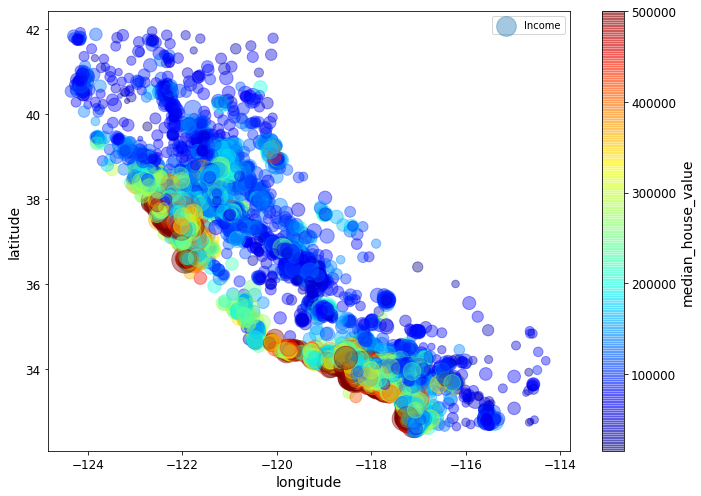

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["median_income"]*50, label="Income", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
plt.tight_layout()
plt.savefig('results/housing_prices_scatterplot.pdf', format='pdf', dpi=300)
plt.show()

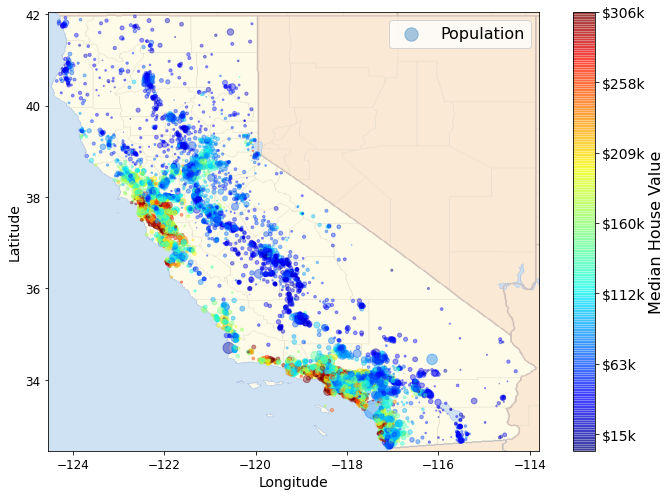

In [ ]:
#definir mapa y disperción
import matplotlib.image as mpimg
california_img=mpimg.imread('datasets/california.png')
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.tight_layout()
plt.savefig('results/california_housing_prices_plot.pdf', format='pdf', dpi=300)
plt.show()

# **Ejercicio 2**

- Discuta sobre la visualización de los datos georreferenciados respecto a las variables consideradas



**Identificación de correlaciones**

La [correlación](https://en.wikipedia.org/wiki/Correlation) es una de las medidas básicas para definir relaciones lineales entre atributos.

$R_{xy} = \mathbb{E}\{xy\}$: correlación

$\sigma_{xy} = \mathbb{E}\{(x-\mu_x)(y-\mu_y)\}$ : covarianza

**Coeficiente de Pearson**:

$\rho_{xy} = \frac{\sigma_{xy} }{\sigma_{x}\sigma_y} \in [-1,1]$

$\sigma^2_x = \mathbb{E}\{(x-\mu_x)^2\}$: varianza

$\sigma_x$ : desviación estandar (std)

In [ ]:
corr_matrix = housing.corr() #función para calcular las correlaciones entre las variables
corr_matrix.style.background_gradient(cmap='coolwarm')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


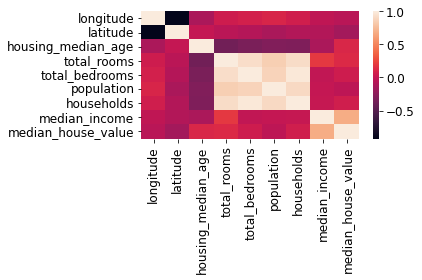

In [ ]:
import seaborn as sns #librería útil para graficar mapas de calor, matrices
sns.heatmap(corr_matrix,xticklabels=corr_matrix.columns.values,yticklabels=corr_matrix.columns.values)
plt.tight_layout()
plt.savefig('results/corr_matrix.pdf', format='pdf', dpi=300)
plt.show()


In [ ]:
corr_matrix["median_house_value"].sort_values(ascending=False) #orgnizar correlaciones con variable a predecir

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

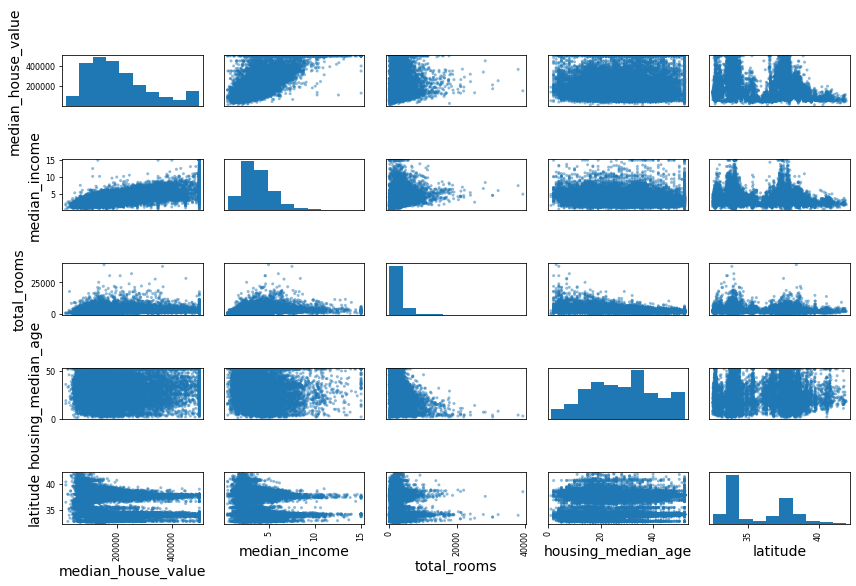

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age","latitude"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.tight_layout()
plt.savefig('results/scatter_matrix_plot.pdf', format='pdf', dpi=300)
plt.show()

**Generar nuevas características intuitivas**

En muchas ocasiones relaciones entre las variables pueden generar nuevas características (ingeniería de características).

In [ ]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,6.096552,0.182692,3.167241


In [ ]:
corr_matrix = housing.corr()#correlación incluyendo nuevas variables
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,534.914639,1419.687379,497.011810,3.875884,207005.322372,5.440406,0.212873,3.096469
std,2.001828,2.137963,12.574819,2138.417080,412.665649,1115.663036,375.696156,1.904931,115701.297250,2.611696,0.057378,11.584825
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566950,119800.000000,4.442168,0.175304,2.431352
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550,179500.000000,5.232342,0.203027,2.817661
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.000000,602.000000,4.745325,263900.000000,6.056361,0.239816,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


# Preparar los datos para los algoritmos de aprendizaje de máquina

In [ ]:
housing = strat_train_set.drop("median_house_value", axis=1) # eliminar variable de salida de las entradas
housing_labels = strat_train_set["median_house_value"].copy()

In [ ]:
housing_labels

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
           ...   
15174    268500.0
12661     90400.0
19263    140400.0
19140    258100.0
19773     62700.0
Name: median_house_value, Length: 16512, dtype: float64

In [ ]:
housing.isnull().any(axis=1) # cualquier columna con alguna fila en null

12655    False
15502    False
2908     False
14053    False
20496    False
         ...  
15174    False
12661    False
19263    False
19140    False
19773    False
Length: 16512, dtype: bool

In [ ]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1) ].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN


In [ ]:
tmp = housing[(housing.isnull().any(axis=1)) & (housing['latitude'] > 35)]
tmp

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN
13069,-121.30,38.58,16.0,1537.0,NaN,1125.0,375.0,2.6471,INLAND
19607,-121.02,37.48,26.0,467.0,NaN,244.0,83.0,4.1346,INLAND
...,...,...,...,...,...,...,...,...,...
12570,-121.44,38.54,39.0,2855.0,NaN,1217.0,562.0,3.2404,INLAND
9970,-122.48,38.50,37.0,3049.0,NaN,1287.0,439.0,4.3125,INLAND
16105,-122.50,37.75,44.0,1819.0,NaN,1137.0,354.0,3.4919,NEAR OCEAN
1350,-121.95,38.03,5.0,5526.0,NaN,3207.0,1012.0,4.0767,INLAND


# Opciones básicas para lidiar con datos perdidos

1. Quitar filas (instancias con característica perdida)
2. Quitar columnas (se elimina la característica completa si presenta datos perdidos)
3. Se estiman los valores perdidos mediante mediana, promedio, moda, o estimaciones por vecindario.

In [ ]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # opción 1: eliminar filas

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [ ]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # opción 2: eliminar columnas

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,1145.0,480.0,6.3580,NEAR OCEAN


In [ ]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # opción 3: estimar datos perdidos
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580,NEAR OCEAN


**Clase Imputer de scikit-learn contiene este preproceso para datos perdidos**

In [ ]:
from sklearn.impute import SimpleImputer  # clase para completar datos perdidos
imputer = SimpleImputer(strategy="median") #crear objeto con estimador de mediana

Se deben remover las variables nominales para aplicar la opción por mediana:

In [ ]:
housing_num = housing.drop('ocean_proximity', axis=1)

In [ ]:
imputer.fit(housing_num) #se ajusta el modelo de completar datos numéricos

SimpleImputer(strategy='median')

In [ ]:
imputer.statistics_ #valores obtenidos en preproceso imputer por atributo numérico->mediana

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

Dichos valores son las mismas medianas:

In [ ]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

Aplicar el preproceso (transformación) según lo entrenado con imputer:

In [ ]:
X = imputer.transform(housing_num)#se aplica el modelo de completar datos
X #el transformer devuleve un array

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [ ]:
X = imputer.fit_transform(housing_num)

In [ ]:
housing_num_imp = pd.DataFrame(X, columns=housing_num.columns)
                          #index = list(housing.index.values)) #se puede volver a pandas frame

In [ ]:
housing_num_imp

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [ ]:
housing_num_imp.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [ ]:
imputer.strategy

'median'

# Cómo trabajar con variables nominales (categóricas)? (ej: 'ocean_proximity')

1. **Etiquetar (codificar) los textos**. Problemas: la noción de cercanía pierde sentido
2. **One-hot-encoding** una nueva característica binaria se genera por cada categoría de la variable de interés. Problema: el número de características crece considerablemente.

In [ ]:
housing["ocean_proximity"].unique()

array(['INLAND', 'NEAR OCEAN', '<1H OCEAN', 'NEAR BAY', 'ISLAND'],
      dtype=object)

In [ ]:
housing_cat = housing[['ocean_proximity']]#ejemplo con ocean proximity
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)#se entrena y evalua en cascada
#ordinal_encoder.fit(housing_cat) #entreno
#housing_cat_encoded = ordinal_encoder.transform(housing_cat) #transformar/evaluar
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [ ]:
ordinal_encoder.categories_#codificación según orden implementado

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=True)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

Por defecto, la clase `OneHotEncoder` retorna un arreglo ralo (sparse: la mayoría de elementos en 0), se puede usar la función `toarray()` para trabajar con arreglos completos (full).

In [ ]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

También se puede fijar la opción  `sparse=False` en `OneHotEncoder`:

In [ ]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

# Esquema general (pipeline) de preproceso para atributos numéricos

1. Lidiar con datos perdidos -> SimpleImputer
2. Escalado de atributos (min max ; estandarización - zscore). Min-max sensible a atípicos  

In [ ]:
#datos numéricos
housing_num_imp.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


In [ ]:
#pandas datos categóricos
housing_cat_ord = pd.DataFrame(housing_cat_encoded,columns=['Ocean_encoded'])
housing_cat_ord.head()

,Ocean_encoded
0,1.0
1,4.0
2,1.0
3,4.0
4,0.0


In [ ]:
#pandas datos categóricos 1 hot encoder
housing_cat_1hot = pd.DataFrame(housing_cat_1hot,columns=list(range(housing_cat_1hot.shape[1])))
housing_cat_1hot.head()

,0,1,2,3,4
0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0


In [ ]:
housing_cat_1hot.shape

(16512, 5)

In [ ]:
print(housing_num_imp.shape,housing_cat_ord.shape)

(16512, 8) (16512, 1)


In [ ]:
housing_cat_ord.isnull().sum()

Ocean_encoded    0
dtype: int64

In [ ]:
housing_tr = pd.concat([housing_num_imp,housing_cat_ord],axis=1)#concatenar pandas numéricos y categóricos sobre columnas
housing_tr.shape

(16512, 9)

In [ ]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,Ocean_encoded
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,1.0
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,4.0
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,1.0
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,4.0
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,0.0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(housing_tr)
housing_tr_nor = scaler.transform(housing_tr)

In [ ]:
housing_tr_num = pd.DataFrame(housing_tr_nor,columns=housing_tr.columns)
housing_tr_num.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,Ocean_encoded
count,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04
mean,-5.249246e-15,2.811597e-16,8.778508e-17,-1.549148e-17,-1.358732e-16,6.454785e-19,-1.054282e-17,1.148414e-16,4.776541e-17
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00
min,-2.385075e+00,-1.449702e+00,-2.199176e+00,-1.223624e+00,-1.294906e+00,-1.269855e+00,-1.317625e+00,-1.772289e+00,-8.230563e-01
25%,-1.111200e+00,-7.948529e-01,-8.472270e-01,-5.516115e-01,-5.792186e-01,-5.698016e-01,-5.803051e-01,-6.871505e-01,-8.230563e-01
50%,5.323472e-01,-6.451732e-01,2.756357e-02,-2.354803e-01,-2.457180e-01,-2.291867e-01,-2.369322e-01,-1.755153e-01,-1.190048e-01
75%,7.821265e-01,9.732389e-01,6.637749e-01,2.424578e-01,2.606187e-01,2.682904e-01,2.794582e-01,4.564298e-01,-1.190048e-01
max,2.630493e+00,2.951818e+00,1.856671e+00,1.716156e+01,1.381730e+01,3.071120e+01,1.293901e+01,5.839873e+00,1.993150e+00


In [ ]:
housing_tr_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,Ocean_encoded
0,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647,-0.119005
1,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168,1.993150
2,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434,-0.119005
3,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929,1.993150
4,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752,-0.823056


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

my_pipeline = Pipeline([
        ('std_scaler', StandardScaler()), #MinMaxScaler StandardScaler
        ('reg',LinearRegression())
    ])


In [ ]:
my_pipeline

Pipeline(steps=[('std_scaler', StandardScaler()), ('reg', LinearRegression())])

# Seleccionar un modelo y entrenar sobre los datos preparados

In [ ]:
#entrenar el pipeline completo
my_pipeline.fit(housing_tr,housing_labels)

Pipeline(steps=[('std_scaler', StandardScaler()), ('reg', LinearRegression())])

In [ ]:
output_e = my_pipeline.predict(housing_tr)#estimación de la salida sobre modelo entrenado

Entrenar sobre un subconjunto de datos:

In [ ]:
# evaluar sobre algunos datos
some_data = housing_tr.loc[:5]
some_labels = housing_labels.loc[:5]

print("Predicciones:", my_pipeline.predict(some_data))

Predicciones: [ 95506.54304879 293131.30910549 176504.67019204 177145.8431039
 243341.71471285 199818.48517165]


Comparar con datos verdaderos:

In [ ]:
print("Labels:", list(some_labels))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0, 165700.0, 412300.0, 349600.0, 181300.0, 500001.0, 57500.0, 350000.0, 238800.0, 80300.0, 200400.0, 333700.0, 158000.0, 276800.0, 327200.0, 194500.0, 163100.0, 331200.0, 92000.0, 153400.0, 139100.0, 85900.0, 238100.0, 173500.0, 196100.0, 442900.0, 234600.0, 195400.0, 264100.0, 415800.0, 282300.0, 345200.0, 85000.0, 279400.0, 95700.0, 191800.0, 225400.0, 163500.0, 150300.0, 217100.0, 157500.0, 163200.0, 105100.0, 213700.0, 98200.0, 235300.0, 182400.0, 390800.0, 179900.0, 46700.0, 339800.0, 151400.0, 105000.0, 183300.0, 125700.0, 123600.0, 249400.0, 152600.0, 293300.0, 116700.0, 133000.0, 261900.0, 87500.0, 126500.0, 261600.0, 225800.0, 196500.0, 109800.0, 174400.0, 217700.0, 172400.0, 325000.0, 132200.0, 184800.0, 163700.0, 142500.0, 50000.0, 307400.0, 253700.0, 340400.0, 72300.0, 121800.0, 85000.0, 148200.0, 118800.0, 263100.0, 344200.0, 315600.0, 156000.0, 136300.0, 362900.0, 90500.0, 240000.0, 405200.0, 187300.0, 133200.0, 116100

In [ ]:
some_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,Ocean_encoded
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,1.0
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,4.0
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,1.0
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,4.0
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,0.0
5,-122.04,37.96,28.0,1207.0,252.0,724.0,252.0,3.6964,3.0


In [ ]:
from sklearn.metrics import mean_squared_error #se cálcula el ajuste entre las predicciones y los datos usando el mse
lin_mse = mean_squared_error(housing_labels, output_e)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

69957.31159823203

Cuantificar rendimiento con error absoluto medio:

In [ ]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, output_e)
lin_mae

50972.40125162182

**Nota:** el mse y el mae se basan en el concepto norma-2 y norma-1 del error:

$${\rm{mse}}(\mathbf{y},\hat{\mathbf{y}})=\|\mathbf{y} -\hat{\mathbf{y}}\|_2$$

$${\rm{mae}}(\mathbf{y},\hat{\mathbf{y}})=\|\mathbf{y} -\hat{\mathbf{y}}\|_1$$


In [ ]:
my_pipeline[1].coef_

array([-85151.87104725, -90489.10688363,  14804.29875672, -14356.89437814,
        34373.68107284, -44322.76752929,  29305.47132193,  75661.08402738,
         -257.26192026])

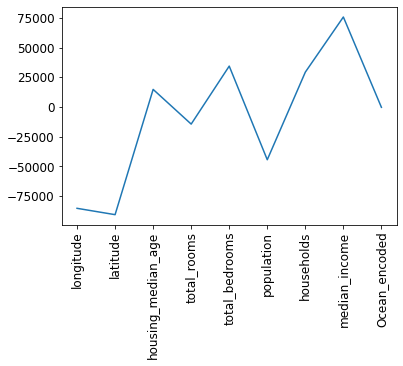

In [ ]:
plt.figure()
plt.plot(range(9),my_pipeline[1].coef_)
plt.xticks(range(9),some_data.columns,rotation=90)
plt.show()

# **Ejercicio 3**

- Repetir el proceso expuesto para codificación OneHotEncoder y la normalización MinMaxScaler.

- Compare y discuta los resultados en términos del mse y el mae.

In [ ]:
#Ayuda de código:
#concatenar datos numericos completos con codificacion onehot de ocean proximity
housing_tr2 = pd.concat([housing_num_imp,housing_cat_1hot],axis=1)#concatenar pandas numéricos y categóricos sobre columnas
housing_tr2.shape

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

ohe = OneHotEncoder(sparse = False)
le = LabelEncoder()
ohe.fit_transform(le.fit_transform(housing_cat).reshape(-1, 1))

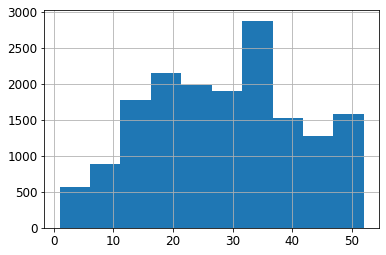

In [ ]:

housing["housing_median_age"].hist()
plt.show()

In [ ]:


split = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=0)
for train_index, test_index in split.split(housing, housing["house_median_age_cat"].values): #es la variable a utilizar para estratificar
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

KeyError: ignored

In [ ]:
housing["housing_median_age_cat"].value_counts()

# Sintonizar el modelo

Debemos verificar que el modelo no se este sobreajustando: i) necesitamos más datos? ii) un modelo más simple? iii) restringirlo (regularizarlo)?

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor()
#se estiman el rendimiendo sobre el conjunto de test para 10 particiones
#se presenta el score del conjunto de test en cada partición
scores = cross_val_score(reg, housing_tr2, housing_labels,
                         scoring="neg_mean_squared_error", cv=5,verbose=100,n_jobs=-1) #scikitlearn trabaja con función util (mayor mejor) no función de costo (menor mejor)
tree_rmse_scores = np.sqrt(-scores)
#verbose presenta en pantalla la evolución del proceso
#n_jobs = -1 permite paralelizar sobre cpu

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

In [ ]:
reg_lin = LinearRegression()#se prueba sobre un regresor lineal
scores = cross_val_score(reg, housing_tr2, housing_labels,
                         scoring="neg_mean_squared_error", cv=5,verbose=100,n_jobs=-1)

lin_scores = cross_val_score(reg_lin, housing_tr2, housing_labels,
                             scoring="neg_mean_squared_error", cv=10,verbose=100,n_jobs=-1)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Búsqueda de hyperparámetros por regilla en validación cruzada:

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # se evaluan 12 (3×4) combinaciones de hiperparámetros
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # se evaluan 6 (2×3) combinaciones
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# se generan 5 folds, para un total de (12+6)*5=90 entrenamientos
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, verbose=100,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_tr2, housing_labels)

Los mejores hyperparámetros encontrados:

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

Observemos los hyperparámetros escogidos durante las particiones:

In [ ]:
cvres = grid_search.cv_results_#revisar los resultados por cv
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

In [ ]:
housing_tr2

In [ ]:
#-----------------------------------------------------------------------
# new input sample
new_input_sample = np.array([-111.0, 35, 25,2000,700,2100,500,5,1,0,0,0,0]).reshape(1, -1)
print('El precio estimado de esta casa es:',grid_search.best_estimator_.predict(new_input_sample))
#-----------------------------------------------------------------------

In [ ]:
some_labels

In [ ]:
pd.DataFrame(grid_search.cv_results_)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV #CV aleatorizada
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),#regilla con muestreo aleatorio bajo distribución uniforme
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,verbose=100,n_jobs=-1,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_tr, housing_labels)

In [ ]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

# Material extra

## Pipeline completo para preparación de datos y predicción

In [ ]:
full_pipeline_with_predictor = Pipeline([
        ("std_sca", StandardScaler()),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(housing_tr, housing_labels)
full_pipeline_with_predictor.predict(some_data)

## Creación de modelo eficiente con joblib

In [ ]:
my_model = full_pipeline_with_predictor

In [ ]:
import joblib #https://joblib.readthedocs.io/en/latest/
joblib.dump(my_model, "results/my_model.pkl") # DIFF  https://docs.python.org/2/library/pickle.html
#...
my_model_loaded = joblib.load("results/my_model.pkl") # DIFF

## Ejemplos de distribuciones en SciPy para `RandomizedSearchCV`

In [ ]:
from scipy.stats import geom, expon
#algunas distribuciones desde scipy para buscar hiperparámetros
geom_distrib=geom(0.5).rvs(10000, random_state=42)
expon_distrib=expon(scale=1).rvs(10000, random_state=42)
plt.hist(geom_distrib, bins=50)
plt.show()
plt.hist(expon_distrib, bins=50)
plt.show()

In [ ]:
from sklearn.linear_model import ElasticNet

Elastic_reg = ElasticNet(random_state=0)
Elastic_reg.fit(housing_tr, housing_labels)
#GridCV RandomCV
housing_predictions = Elastic_reg.predict(housing_tr)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

In [ ]:
#guardar resultados
from google.colab import files
from datetime import date, datetime
import shutil
#guardar resultados
namefile = str(datetime.now().strftime("%Y_%m_%d_%H_%M_%d"))+'__results'
shutil.make_archive(namefile, 'zip', 'results')
files.download(namefile+'.zip')